# One-hot encoding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import scipy
# Visualisation lib
import matplotlib.pyplot as plt
# Model lib
from sklearn.linear_model import LinearRegression
# Transformation models
from scipy import stats as stats
from sklearn import preprocessing

# dataset splitting method
from sklearn.model_selection import train_test_split

# residual plot
from yellowbrick.regressor import ResidualsPlot

In [2]:
# Data retrieval
df = pd.read_csv('salary.csv')
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


### Data Cleaning

In [3]:
# Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


In [4]:
# Locate the null value in the Salary column.
np.where(pd.isnull(df))

(array([208]), array([0]))

In [5]:
# View the null value
df.iloc[208]

salary           NaN
exprior         0.00
yearsworked    21.00
yearsrank      10.00
market          0.93
degree          1.00
otherqual       0.00
position        3.00
male            1.00
Field           4.00
yearsabs        1.00
Name: 208, dtype: float64

In [6]:
# Since the observation is missing the salary value we don't have a choice but to drop it.

In [7]:
# Drop the null observation
dropped = df.drop([208], axis=0)

# Re-Check whether there are more null values.
np.where(pd.isnull(dropped))

(array([], dtype=int64), array([], dtype=int64))

### Data Visualisation

### A. Create scatterplots, histograms, and a descriptive statistics table of the variables of interest.

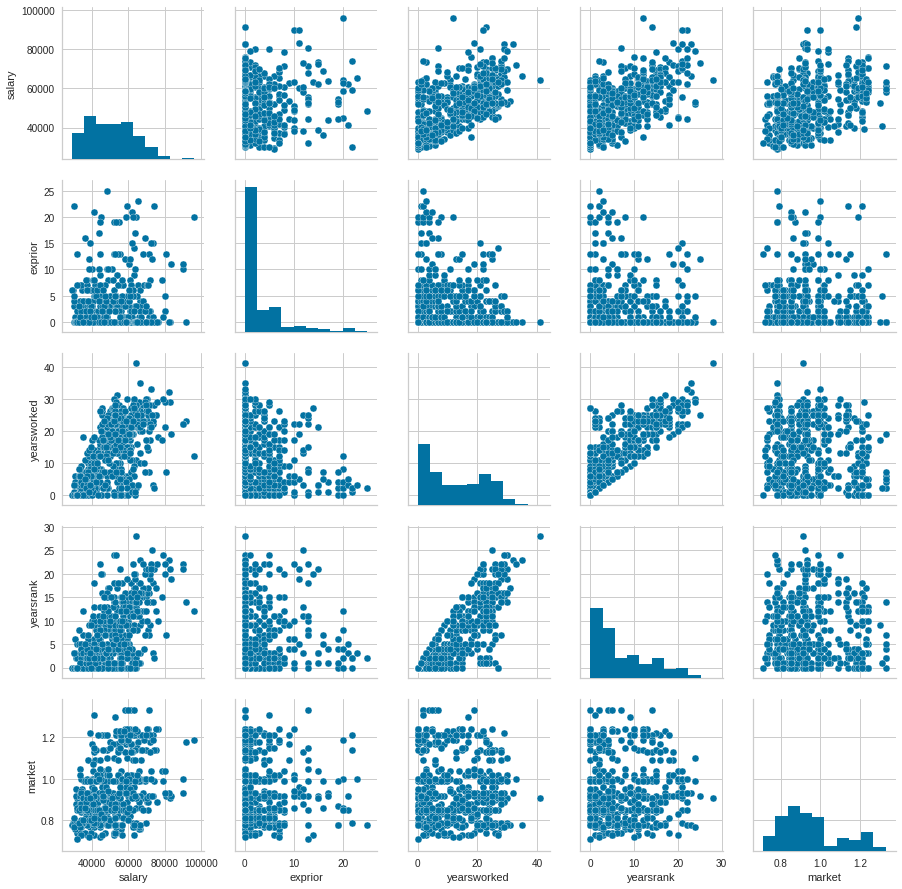

In [8]:
sns.pairplot(dropped[['salary', 'exprior', 'yearsworked', 'yearsrank', 'market']])
plt.show()

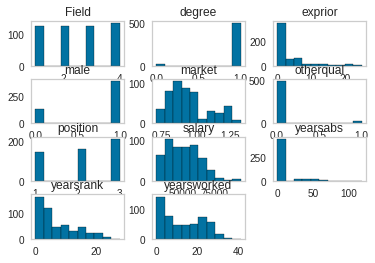

In [9]:
ax = dropped.hist(edgecolor='black', grid=False)
plt.show()

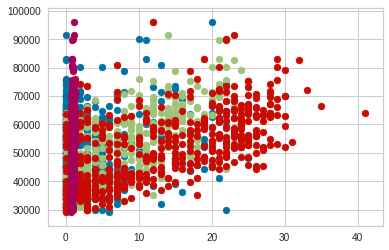

In [10]:
# Relationship of each var with the Salary
Y = np.array(dropped.salary)
Xe = np.array(dropped.exprior)
Xr = np.array(dropped.yearsrank)
Xw = np.array(dropped.yearsworked)
Xm = np.array(dropped.market)
X = [Xe, Xr, Xw, Xm]
# Plot scatter plot
for x in  X:
    plt.scatter(y=Y, x=x)
plt.show()

From the above you can tell that the varibles have a relationship with the amount of salary earned.

Descriptive data

In [11]:
# Correlation
print(dropped.corr()['salary']['exprior':'market'])

exprior        0.119989
yearsworked    0.623589
yearsrank      0.610706
market         0.407214
Name: salary, dtype: float64


In [12]:
# data description
dropped.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


### B. Recode the variable Field into three dummy variables, using HR as the reference category. 

In [13]:
dropped.head(2)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0


In [33]:
# Create dummmy variable for Field col.
fiel_dummies = pd.get_dummies(dropped.Field)

# Rename Dummy cols
fiel_dummies.columns = ['Engineering','Finance','Human Resources','Marketing']

# Merge DVs to Original DF and Drop Field col.
field_dummmy_coding = pd.concat([dropped.drop(['Field'],axis=1), fiel_dummies], axis=1)

# Set HR as reference category.
field_dummmy_coding = field_dummmy_coding.drop(['Human Resources'], axis=1)

# Print head of recoded df.
field_dummmy_coding.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,Engineering,Finance,Marketing
0,53000.0,0,0,0,1.17,1,0,1,1,0,0,0,0
1,58000.0,1,0,0,1.24,1,0,1,1,0,0,1,0
2,45500.0,0,0,0,1.21,1,0,1,1,2,0,0,0
3,35782.0,0,2,1,0.99,1,0,1,1,1,0,0,1
4,34731.0,0,2,2,0.91,1,0,1,1,1,0,0,1


In [34]:
# Create dummmy variable for Field col.
pos_dummies = pd.get_dummies(field_dummmy_coding.position)
# rename columns
pos_dummies.columns = ['Junior Employee','Manager','Executive']

# Merge DVs to Original DF and Drop Field col.
final = pd.concat([field_dummmy_coding.drop(['position'],axis=1), pos_dummies], axis=1)

# Print head of recoded df.
final.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,male,yearsabs,Engineering,Finance,Marketing,Junior Employee,Manager,Executive
0,53000.0,0,0,0,1.17,1,0,1,0,0,0,0,1,0,0
1,58000.0,1,0,0,1.24,1,0,1,0,0,1,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,2,0,0,0,1,0,0
3,35782.0,0,2,1,0.99,1,0,1,1,0,0,1,1,0,0
4,34731.0,0,2,2,0.91,1,0,1,1,0,0,1,1,0,0


In [35]:
np.where(pd.isnull(final))

(array([], dtype=int64), array([], dtype=int64))

### C. Produce a correlation matrix comparing the relationship of salary to the predictor variables. Is there any multicollinearity or other problems that may be a problem in the multiple regression?

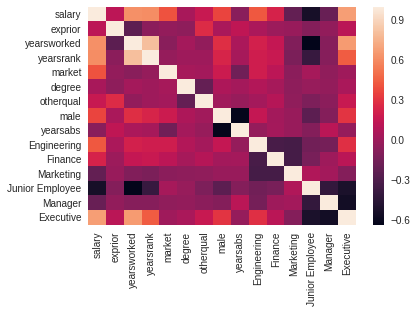

In [36]:
corr = final.corr()
sns.heatmap(corr)
plt.show()

Multicollinearity is a major problem, because it increases the variance of the regression coefficients, making them unstable. The more variance they have, the more difficult it is to interpret the coefficients.Our MultiCollinearity treshhold coefficient  will be **0.7**, so if the Correlation Coeffient of the correlated predictor variables is bigger than 0.7, I'll drop one of the variables.

In [37]:
# Check the correlation coefficient that is greater than 0.7
Corr_bool = corr > 0.7

In [38]:
print("We expect the Correlation matrix to return ", len(corr.columns)," Trues, values greater than 0.7 if it doesn't have multicollinearity")

We expect the Correlation matrix to return  15  Trues, values greater than 0.7 if it doesn't have multicollinearity


In [39]:
print("Amount of trues in a column: ",sum(Corr_bool.values))
print("Amount of columns that contain true: ",len(sum(Corr_bool.values)))
print("Amount of trues in the DataFrame: ",sum(sum(Corr_bool.values)))
print("Amount of correlated inddependent var: ",sum(sum(Corr_bool.values)>1))
print("Location of correlated variables:",np.where(sum(Corr_bool.values)>1))

Amount of trues in a column:  [1 1 2 2 1 1 1 1 1 1 1 1 1 1 1]
Amount of columns that contain true:  15
Amount of trues in the DataFrame:  17
Amount of correlated inddependent var:  2
Location of correlated variables: (array([2, 3]),)


Only two vars are correlated, **the 2nd and 3rd columns**, therefore I'll drop one of the variable, I'll determine the redundant var by comparing 
the correlation of the var against salary then drop the var with a smaller correlation with salary.

In [40]:
# Collinear var against salary
corr['salary'][2:4]

yearsworked    0.623589
yearsrank      0.610706
Name: salary, dtype: float64

Since Yearsworked overall has a much correlation with salary, we'll drop the yearsworked at current position column, to form the final training and prediction dataset.

**Drop the Redundant Variable(Yearsworked at current rank)**

In [41]:
final = final.drop(['yearsrank'], axis=1)

### Dataset splitting

In [42]:
X = final.drop(['salary'], axis=1)
y = final.salary
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

### D. Run the multiple linear regression and interpret the correlation coefficients. What are the most important features when predicting employee salary?

In [43]:
# Create model object
model = LinearRegression()

# Fit data in model object.
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
# Score model precision
y_pred = model.predict(X_train)

In [45]:
print(type(X_train))
print(type(y_pred))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [46]:
training_data = X_train.copy()
training_data['pred_salary'] = y_pred
training_data.corr()['pred_salary']

exprior            0.060149
yearsworked        0.725367
market             0.476660
degree             0.070184
otherqual          0.121749
male               0.411875
yearsabs          -0.079229
Engineering        0.442455
Finance            0.322332
Marketing         -0.283503
Junior Employee   -0.586821
Manager           -0.214214
Executive          0.724912
pred_salary        1.000000
Name: pred_salary, dtype: float64

The most important feactures when predicting the salary are the number of years an individual has worked in total, secondly the relativity of the mount they earn and the market value of the job they do and finally the last variable is whether the employees are Male or not.

### E. Plot the standardised residuals versus the standardised predicted values. Are there any problems with the regression?

##### Linear relationships (Residuals vs Predictor vars):
--------------

According to the linearity assumption the Residual of the predicted should not  have any kind of relationship with one of the many predictor variables of a model.

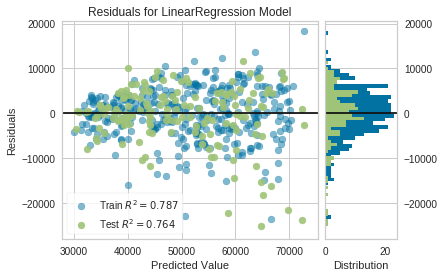

In [48]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

The amount data predicted by model is almost the same as the original data, the model doesn't any major problems except from a few outliers.

###  F. Get and interpret the partial coefficients and tolerance values for the regression model. Are there any problems with this model?

In [49]:
from scipy import stats, linalg

def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """

    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)

            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr

    return P_corr

In [51]:
X_train.columns

Index(['exprior', 'yearsworked', 'market', 'degree', 'otherqual', 'male',
       'yearsabs', 'Engineering', 'Finance', 'Marketing', 'Junior Employee',
       'Manager', 'Executive'],
      dtype='object')

In [52]:
partial = partial_corr(X_train)

In [55]:
partial_c = pd.DataFrame(partial, columns=['exprior', 'yearsworked', 'market', 'degree', 'otherqual', 'male',
       'yearsabs', 'Engineering', 'Finance', 'Marketing', 'Junior Employee',
       'Manager', 'Executive'],index=['exprior', 'yearsworked', 'market', 'degree', 'otherqual', 'male',
       'yearsabs', 'Engineering', 'Finance', 'Marketing', 'Junior Employee',
       'Manager', 'Executive'])

In [56]:
partial_c

,exprior,yearsworked,market,degree,otherqual,male,yearsabs,Engineering,Finance,Marketing,Junior Employee,Manager,Executive
exprior,1.000000,-0.513094,-0.148859,-0.037011,0.170127,0.280149,0.341843,0.115138,0.099295,0.080855,0.141899,0.220002,0.282021
yearsworked,-0.513094,1.000000,-0.185195,-0.129952,-0.100592,0.267967,0.265350,0.209370,0.212273,0.082989,0.224323,0.381496,0.513013
market,-0.148859,-0.185195,1.000000,0.010031,0.047444,0.131593,-0.023737,0.331745,0.301239,0.130522,0.727634,0.708555,0.645487
degree,-0.037011,-0.129952,0.010031,1.000000,-0.356410,0.125362,0.097030,0.100625,0.112779,0.040959,0.554773,0.533715,0.527376
otherqual,0.170127,-0.100592,0.047444,-0.356410,1.000000,-0.086048,-0.116192,0.022222,0.091542,0.039475,0.194137,0.208225,0.241507
male,0.280149,0.267967,0.131593,0.125362,-0.086048,1.000000,-0.682796,-0.007727,-0.021538,-0.006563,0.051025,0.060452,0.065228
yearsabs,0.341843,0.265350,-0.023737,0.097030,-0.116192,-0.682796,1.000000,-0.004539,-0.015563,-0.029141,0.130036,0.135368,0.101460
Engineering,0.115138,0.209370,0.331745,0.100625,0.022222,-0.007727,-0.004539,1.000000,-0.624773,-0.564421,-0.180818,-0.198278,-0.152556
Finance,0.099295,0.212273,0.301239,0.112779,0.091542,-0.021538,-0.015563,-0.624773,1.000000,-0.555373,-0.167958,-0.171529,-0.144862
Marketing,0.080855,0.082989,0.130522,0.040959,0.039475,-0.006563,-0.029141,-0.564421,-0.555373,1.000000,0.040975,0.030752,0.040113
